# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.3064006454471890, performing 52.3 it/sec
Step 100: Loss = 3.1208214463069508, performing 153.5 it/sec
Step 200: Loss = 1.1058164718403698, performing 156.0 it/sec
Step 300: Loss = 0.6940322718655109, performing 117.8 it/sec
Step 400: Loss = 0.2859599935551492, performing 87.9 it/sec
Step 500: Loss = 0.0558944780253201, performing 102.8 it/sec
No improvement since Step 461, early stopping.
[Best]  Step 460: Loss = 0.0549660247682333
[Final] Step 510: Loss = 0.0558247643213996

predicted end states
------------------------------------
         5th       Mean      95th
LF2A-1  1.98e-02  1.98e-02  1.98e-02
LF2A-2  1.72e-10  1.75e-10  1.79e-10
LF2A-3  1.18e-03  1.18e-03  1.18e-03
LF2A-4  1.03e-11  1.05e-11  1.07e-11
LF2A-5  1.18e-11  1.20e-11  1.22e-11
LF2A-6  9.71e-08  9.71e-08  9.71e-08
LF2A-7  3.69e-09  3.69e-09  3.69e-09


predic

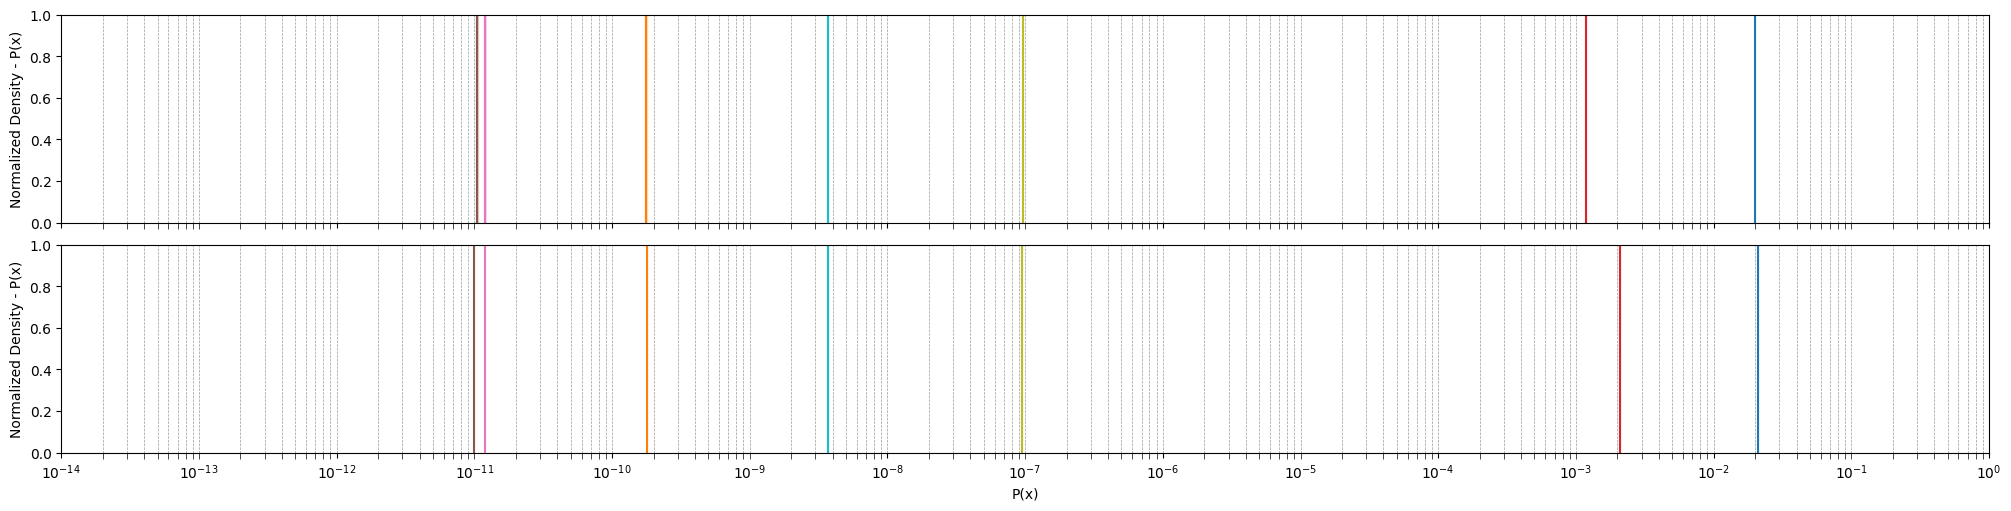

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 2.1e-2,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF2A', 'FSIG', 'FROD', 'BPHR', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LF2A-1': {
        'sequence': [1, 0, 0, 0, np.nan, 0],
        'probability': 2.1e-2,
    },
    'LF2A-2': {
        'sequence': [1, 0, 0, 0, np.nan, 1],
        'probability': 1.80e-10,
    },
    'LF2A-3': {
        'sequence': [1, 0, 0, 1, 0, 0],
        'probability': 2.1e-3,  # frequency unknown
    },
    'LF2A-4': {
        'sequence': [1, 0, 0, 1, 0, 1],
        'probability': 1.00e-11,
    },
    'LF2A-5': {
        'sequence': [1, 0, 0, 1, 1, np.nan],
        'probability': 1.20e-11,
    },
    'LF2A-6': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan],
        'probability': 9.50e-8,
    },
    'LF2A-7': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.7e-9,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)